In [175]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from sklearn import tree   
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [176]:
df = pd.read_csv('titanic-passengersss.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [177]:
df.head().isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [179]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [181]:
df.isnull().sum().sum() 

866

### Here I decided to drop the column 'Cabin' because it had too many nulls

In [182]:
df.drop( ["Cabin"],axis=1 , inplace = True)

### Filling the column 'Age' with the mean of all its values

In [183]:
df["Age"].fillna(df["Age"].mean(), inplace= True)
print(df["Age"])

0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64


In [184]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64

### Dropping all the nulls in the rows of column 'Embarked'

In [185]:
df.dropna(axis = 0,subset=['Embarked'],how='any', inplace= True)

In [186]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Survived is 1 and didn't survive is 0

In [187]:
encoder= LabelEncoder()
df['Survived'] = encoder.fit_transform(df["Survived"]) 

### Females = 0 and Males = 1

In [188]:
df['Sex'] = encoder.fit_transform(df["Sex"])

### Specifying that C=0, S=1, otherwise=2

In [189]:
df['Embarked']= np.where(df['Embarked']=='C',0,np.where(df['Embarked']=='S',1,2))

### Dropping the rows based on logical feature selection

In [190]:
df.drop( ["Ticket"],axis=1 , inplace = True)

In [191]:
df.drop( ["PassengerId"],axis=1 , inplace = True)

### Converting these columns to integer form to have more accurate results and sorted visualizations

In [192]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int32 
 1   Pclass    889 non-null    int64 
 2   Name      889 non-null    object
 3   Sex       889 non-null    int32 
 4   Age       889 non-null    int32 
 5   SibSp     889 non-null    int64 
 6   Parch     889 non-null    int64 
 7   Fare      889 non-null    int32 
 8   Embarked  889 non-null    int32 
dtypes: int32(5), int64(3), object(1)
memory usage: 52.1+ KB


In [194]:
df[["Pclass", "Survived"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.955882


In [195]:
v= df['Name']
Sp1= df['Title'] = v.str.split(', ', expand = True)[1]

In [196]:
print(df['Title'])

0                                        Mr. Erik Gustaf
1                                      Mr. Sigurd Hansen
2                                         Mr. Hans Peder
3                     Mrs. Nils (Alma Cornelia Berglund)
4                                           Mr. Thornton
                             ...                        
886                          Mrs. Nicholas (Adele Achem)
887                                            Mr. Orsen
888                                         Miss. Marija
889                              Mr. Pastcho ("Pentcho")
890    Miss. Kate Florence ("Mrs Kate Louise Phillips...
Name: Title, Length: 889, dtype: object


In [197]:
Sp2= df['Title'] = Sp1.str.split('.', expand = True)[0]

In [198]:
print(Sp2)

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: 0, Length: 889, dtype: object


### Now that I constructed the column 'Title', there is no need for column 'Name'

In [199]:
df.drop( ["Name"],axis=1 , inplace = True)

In [200]:
print(df)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked Title
0           0       2    1   28      0      0    13         1    Mr
1           0       3    1   25      0      0     7         1    Mr
2           0       3    1   20      0      0     7         1    Mr
3           0       3    0   29      0      4    21         1   Mrs
4           0       1    1   31      1      0    52         1    Mr
..        ...     ...  ...  ...    ...    ...   ...       ...   ...
886         1       2    0   14      1      0    30         0   Mrs
887         0       3    1   22      0      0     7         0    Mr
888         0       3    0   30      0      0     8         1  Miss
889         0       3    1   29      0      0     7         1    Mr
890         1       2    0   19      0      0    26         1  Miss

[889 rows x 9 columns]


In [201]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [202]:
df['Title'].replace(Title_Dictionary, inplace = True)

In [203]:
print(df['Title'])

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title, Length: 889, dtype: object


In [204]:
df['FamilySize'] = df['Parch'] + df['SibSp']

### The column 'FamilySize' shows the the number of relatives that were on the titanic ship in total, which made sense of the column 'Parch' and 'Sibsp' combined much more.

In [205]:
print(df['FamilySize'])

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 889, dtype: int64


In [206]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,1,28,0,0,13,1,Mrs,0
1,0,3,1,25,0,0,7,1,Mrs,0
2,0,3,1,20,0,0,7,1,Mrs,0
3,0,3,0,29,0,4,21,1,Mrs,4
4,0,1,1,31,1,0,52,1,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14,1,0,30,0,Mrs,1
887,0,3,1,22,0,0,7,0,Mrs,0
888,0,3,0,30,0,0,8,1,Miss,0
889,0,3,1,29,0,0,7,1,Mrs,0


In [207]:
x=df[['Pclass', 'Fare', 'Age','Sex','SibSp','Parch', 'Embarked','FamilySize']]
y=df['Survived']

### Splitting dataset to 70% training and 30% testing 

In [277]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### Getting accuracy for non-pruned decision tree and plotting a heatmap for the confusion matrix

In [300]:
non_pruned = tree.DecisionTreeClassifier()  
non_pruned.fit(x_train, y_train)   
m1=non_pruned.predict(x_test)   
print("score:{}".format(round(accuracy_score(y_test, m1),2)))

score:0.81


In [301]:
CM1= confusion_matrix(y_test, m1)

<AxesSubplot:>

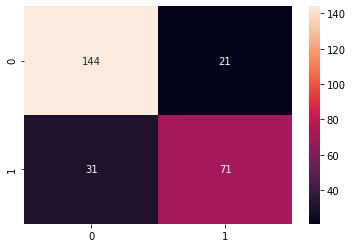

In [302]:
sns.heatmap(CM1, annot=True, fmt='g')

### Plotting the decision tree but ending up with a very large confusing one, needs pruning

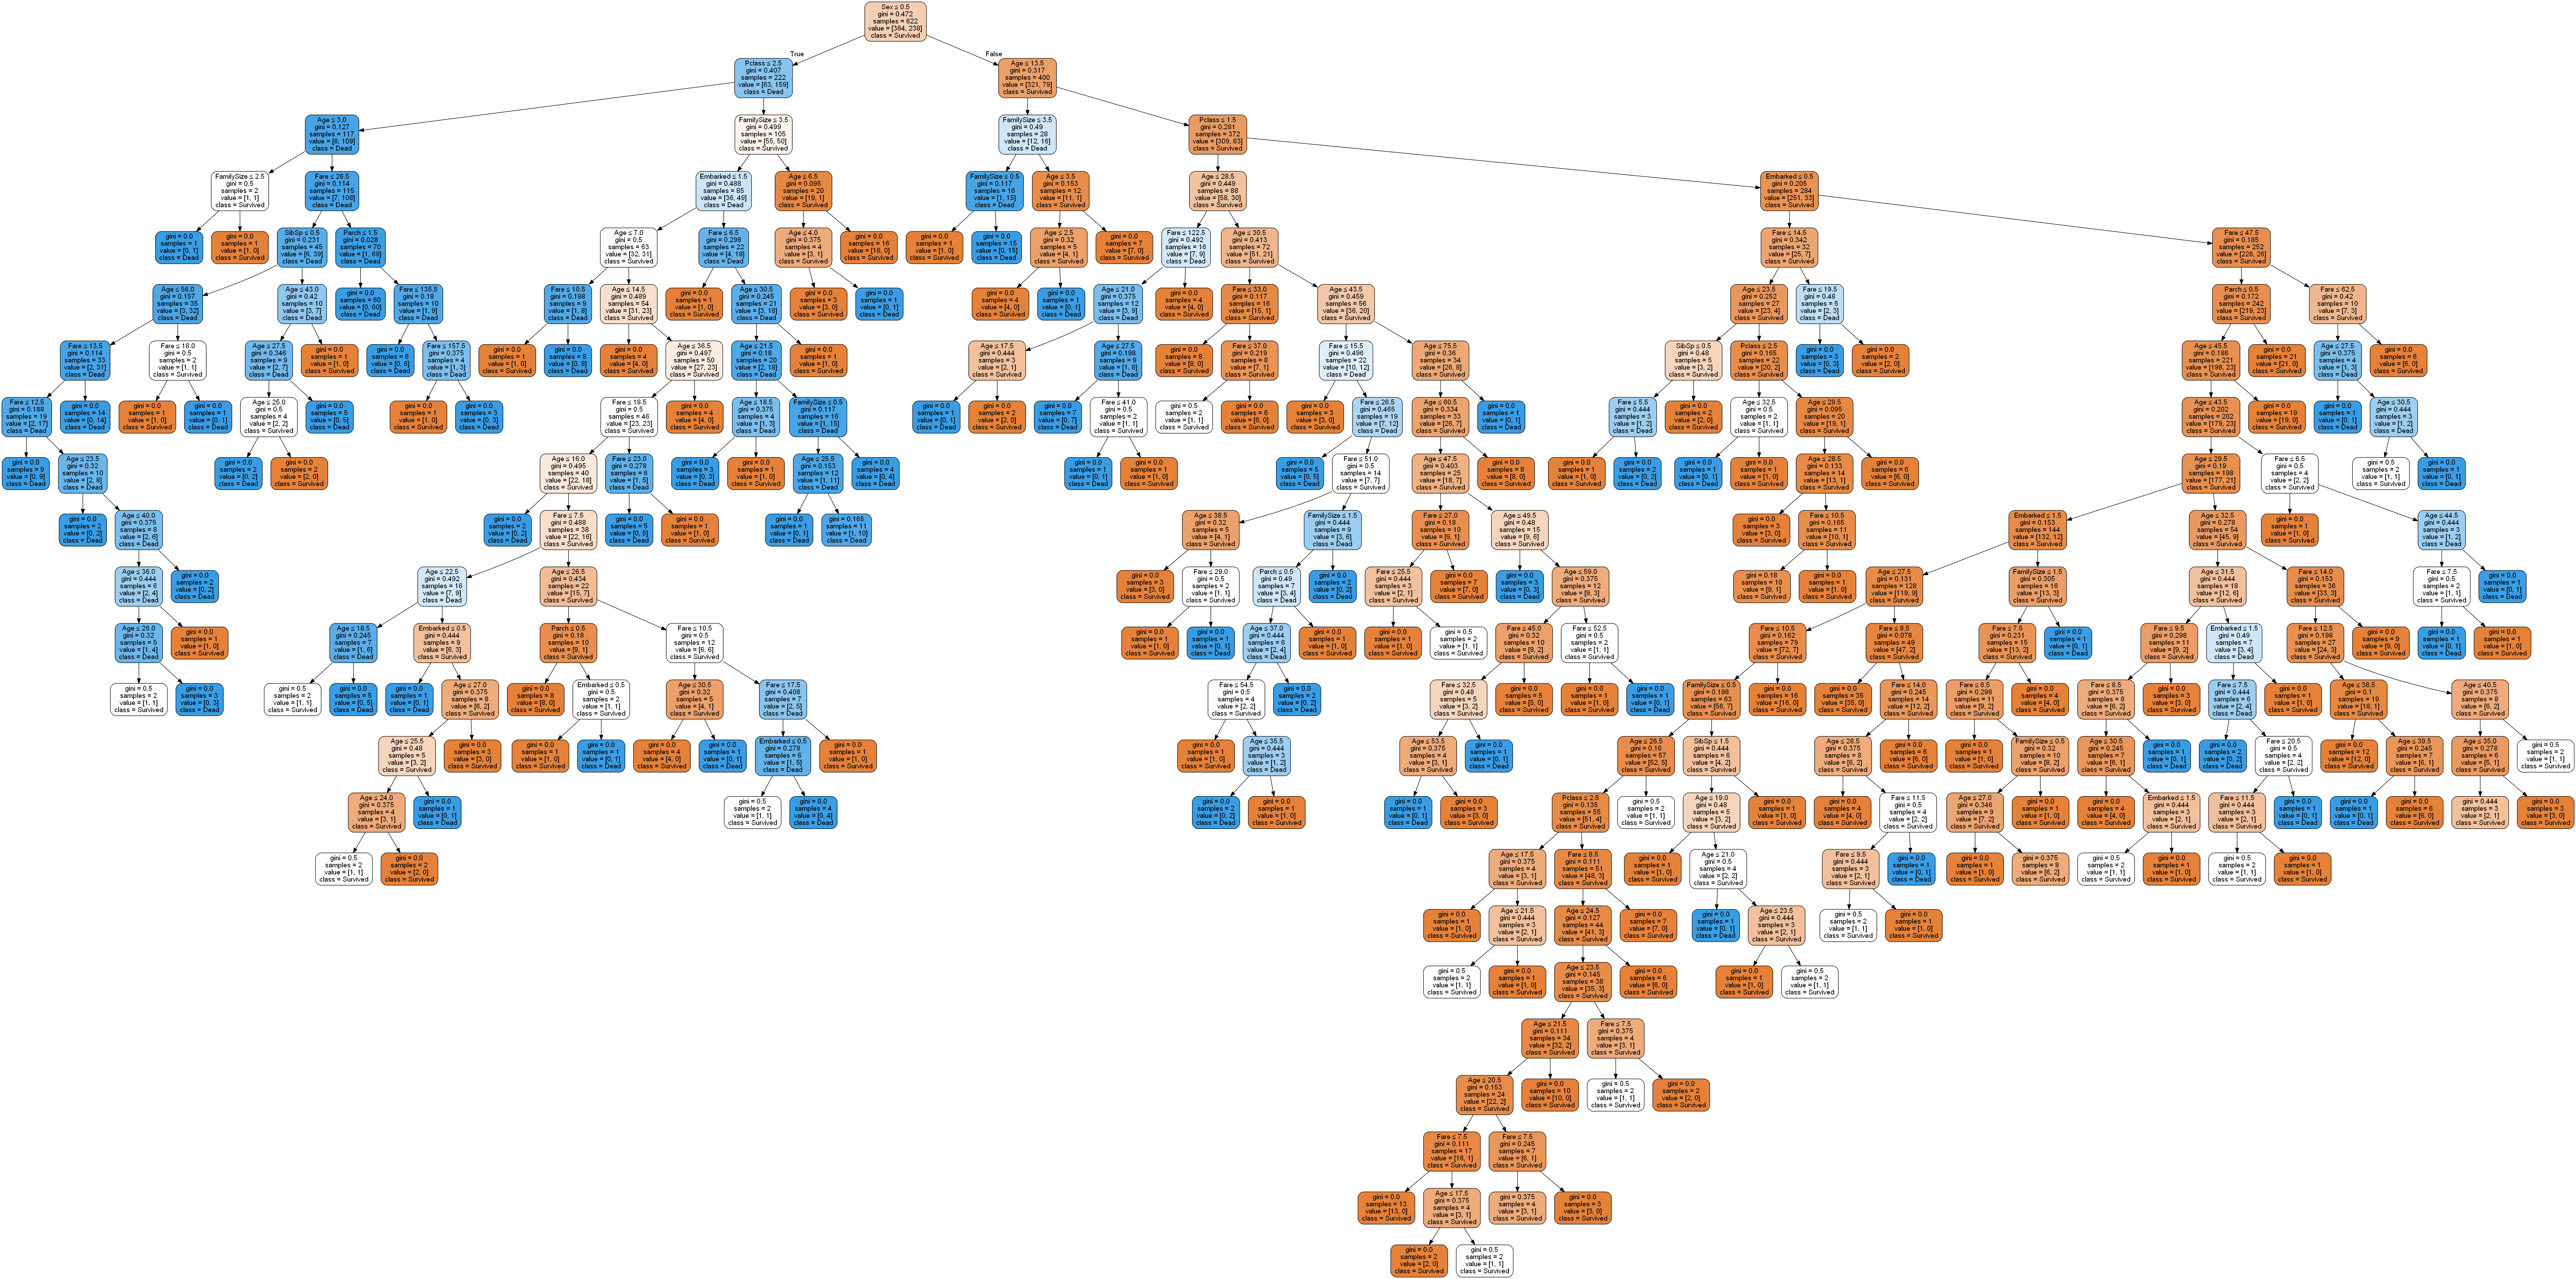

In [303]:
Names=list(x.columns.values)
dot_data = tree.export_graphviz(non_pruned, out_file=None, filled=True, rounded=True,special_characters=True,feature_names= Names,class_names=['Survived','Dead'])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Getting accuracy for pruned decision tree and plotting a heatmap for the confusion matrix

In [445]:
pruned = tree.DecisionTreeClassifier(criterion='gini', splitter= 'random', max_leaf_nodes=15,min_samples_leaf=10, max_depth=10) 
pruned.fit(x_train, y_train)   
m2=pruned.predict(x_test)   
print("score:{}".format(round(accuracy_score(y_test, m2),2)))

score:0.84


In [446]:
CM2= confusion_matrix(y_test, m2)

<AxesSubplot:>

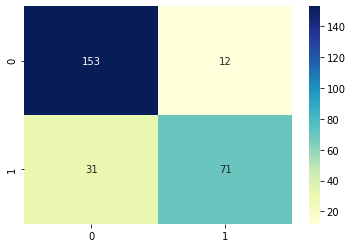

In [447]:
sns.heatmap(CM2, annot=True, fmt='g',cmap='YlGnBu')

### Creating the variable "Names" to have all the feature columns to add in "feature names" parameter to know which variable we are splitting on, and here the lowest gini impurity was the "sex" which is why we started with, and the tree continued splitting until it reached the most purity of leaf nodes 

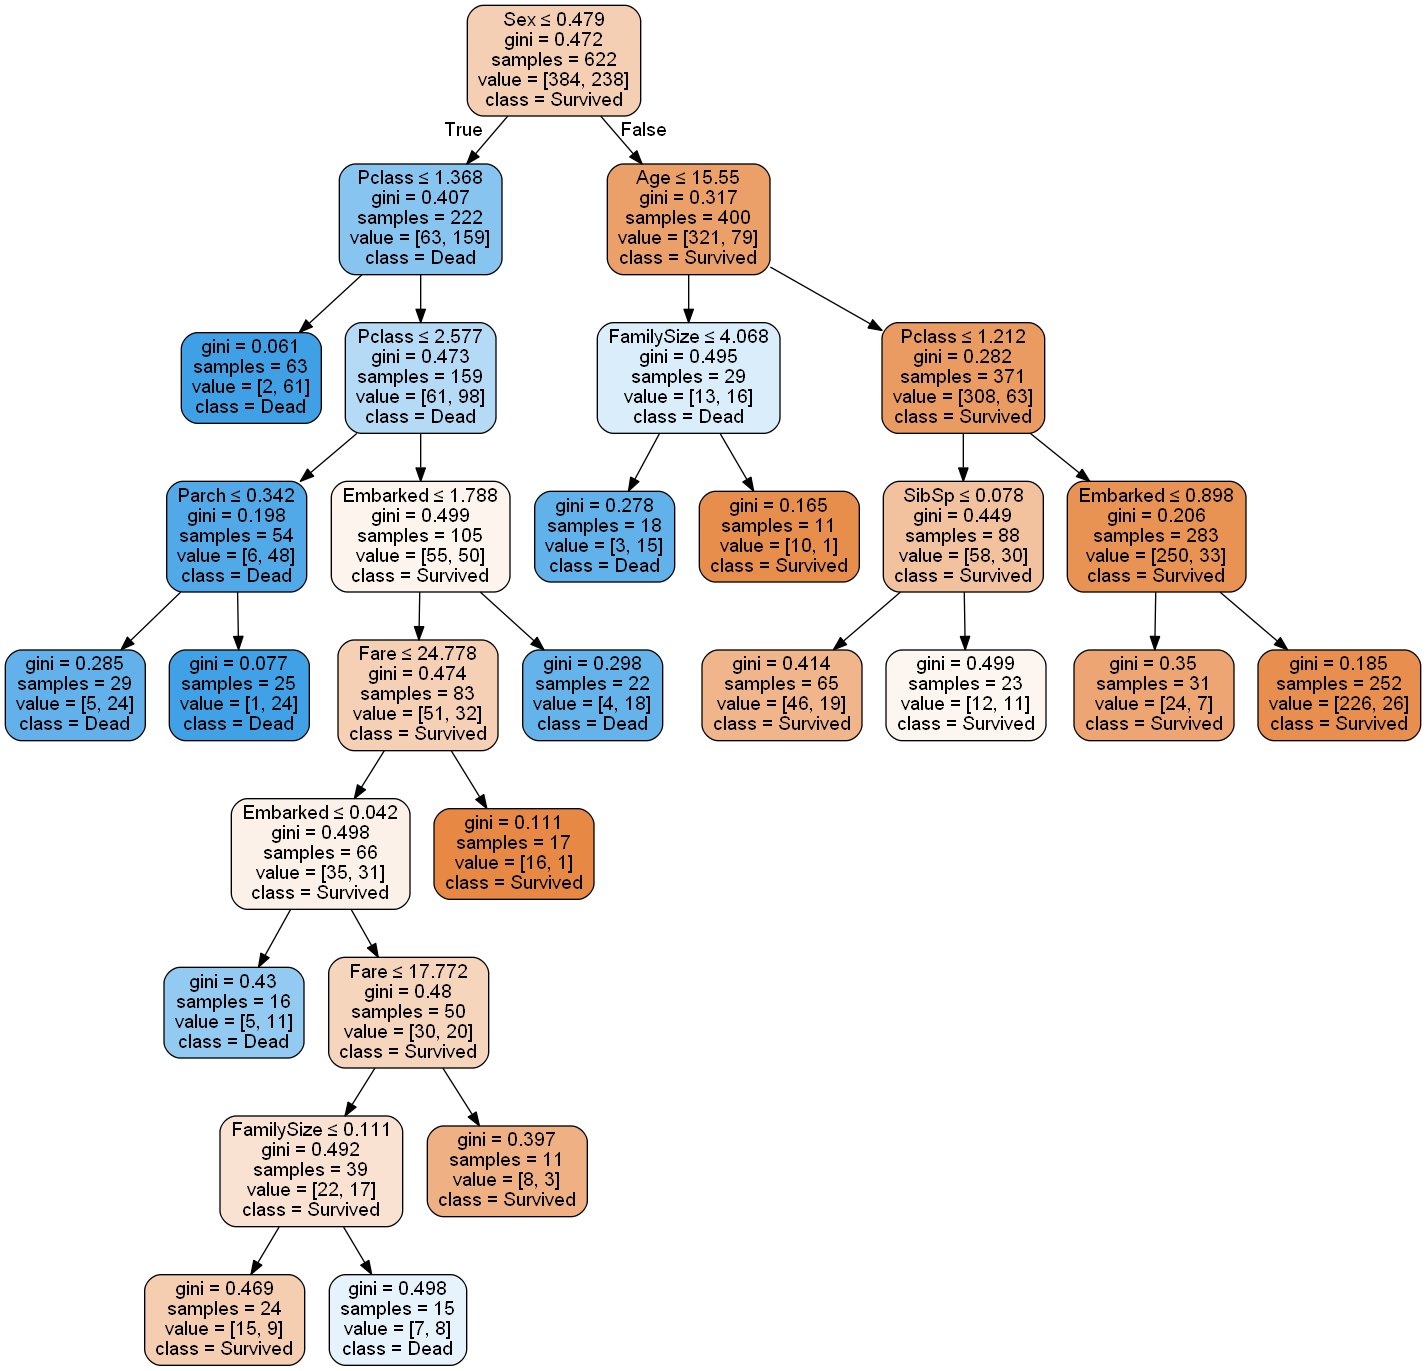

In [448]:
Names=list(x.columns.values)
dot_data = tree.export_graphviz(pruned, out_file=None, filled=True, rounded=True,special_characters=True,feature_names= Names,class_names=['Survived','Dead'])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Creating another pruned model with difference in "max_leaf_nodes" and "max_depth" parameters

In [575]:
pruned2 = tree.DecisionTreeClassifier(criterion='gini', splitter= 'random', max_leaf_nodes=15,min_samples_leaf=1, max_depth=3) 
pruned2.fit(x_train, y_train)   
m3=pruned2.predict(x_test)   
print("score:{}".format(round(accuracy_score(y_test, m3),2)))

score:0.85


In [1048]:
CM3= confusion_matrix(y_test, m3)

<AxesSubplot:>

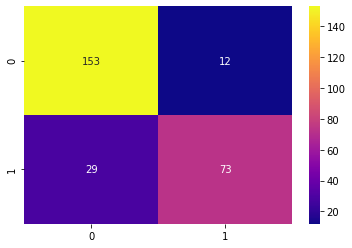

In [1049]:
sns.heatmap(CM3, annot=True, fmt='g',cmap='plasma')

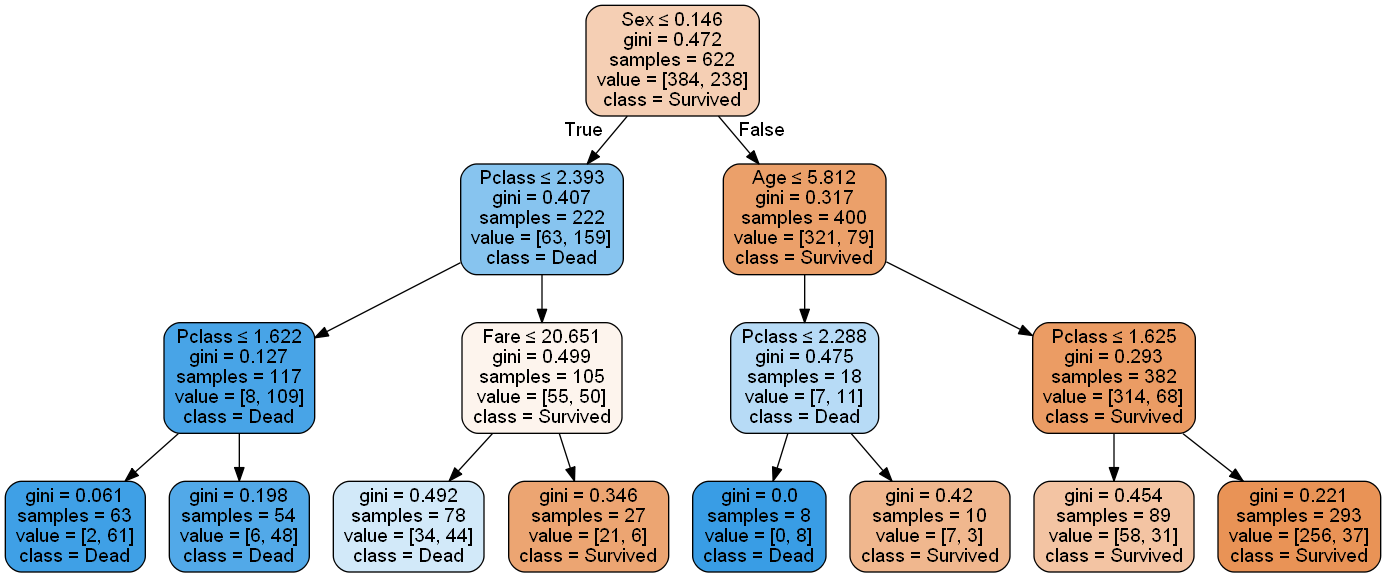

In [1050]:
Names=list(x.columns.values)
dot_data = tree.export_graphviz(pruned2, out_file=None, filled=True, rounded=True,special_characters=True,feature_names= Names,class_names=['Survived','Dead'])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Non-pruned decision tree had accuracy of 0.81, outcome of first pruned tree was 0.84 and the second pruned tree was 0.85, but both had the same TP, FP ,TN, and FN, leaving the greatest difference between the non-pruned tree and the first pruned tree of 0.04% 

In [867]:
clf=RandomForestClassifier(n_estimators=50)  
clf.fit(x_train, y_train)  
m4=clf.predict(x_test)
outclf1= metrics.accuracy_score(y_test, m4)
print(outclf1)

0.8052434456928839


In [903]:
CM4= confusion_matrix(y_test,m4)

<AxesSubplot:>

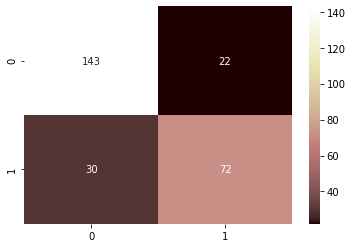

In [905]:
sns.heatmap(CM4, annot=True, fmt='g',cmap='pink')

In [1044]:
clf1=RandomForestClassifier(n_estimators=15)  
clf1.fit(x_train, y_train)  
m5=clf1.predict(x_test)
outclf2= metrics.accuracy_score(y_test, m5)
print(outclf2)

0.8277153558052435


In [1045]:
CM5= confusion_matrix(y_test,m5)

<AxesSubplot:>

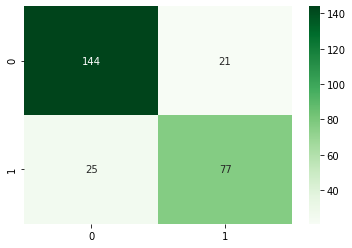

In [1046]:
sns.heatmap(CM5, annot=True, fmt='g',cmap='Greens')

In [1052]:
print("First random forest tree had accuracy of "+ str(round(outclf1,2)) + ", second random forest tree had accuracy of " + str(round(outclf2,2)) + ", which is only a difference of " + str(round(outclf2-outclf1,2)) +" more to second tree that had lower estimator")

First random forest tree had accuracy of 0.81, second random forest tree had accuracy of 0.83, which is only a difference of 0.02 more to second tree that had lower estimator
